__Simulated Nearest Neighbor Generator Code__

__I. Libraries__

In [1]:
# ### libraries used in this script ###
import os
import pandas as pd
import seaborn as sns
from sim_nnd_helper_funct import NearestNeighbors
from sim_nnd_helper_funct import kd_ThomasCluster
from sim_nnd_helper_funct import RepeatThomasClusterNN
from sim_nnd_helper_funct import var_sim
from sim_nnd_helper_funct import bin_one
import numpy as np


In [2]:
## Variables  
radius=564.189
sigma=0.03535 #The value for the radius of a circle 


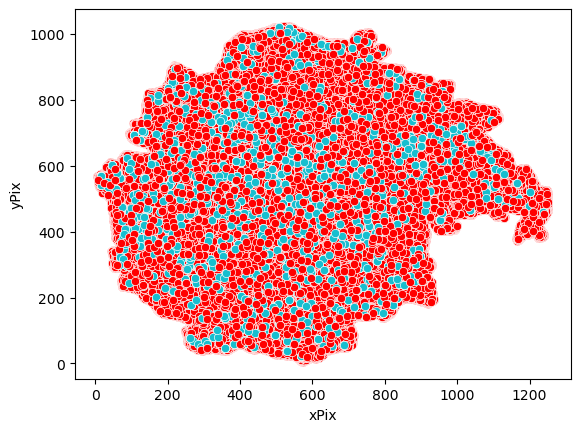

In [3]:
## Identify Emprical Nearest Neighbor Distances between two channel populations (TREK1, Piezo1)

cell=['A']#['d1a2','d1b2','d1c1','d2b2','d2c1','d2c2', 'd3b2','d3c2','d2b1']
input_path=r"C:\Users\mec117\Documents\github_upload\data"
#roi_path=r"Z:\All_Staff\Grandl Lab\Marie Cronin\DONE OE T1P1 8302023\All_ROImeasure"
#pattern = r'd[1-9]([a-z])[1-9]_'
dataframes=[]
for i in cell:
    for name in os.listdir(input_path):
        if name.startswith(i) and name.endswith("_TREK_NND.csv"):
            T1_input_file_path = os.path.join(input_path,name)

            # Read the input CSV file into a DataFrame
            T1_input_df = pd.read_csv(T1_input_file_path)
            T1_input_df['cell']=i
            T1_input_df['channel']='TREK'
    

        elif name.startswith(i) and name.endswith("_Piezo_NND.csv"):
              P1_input_file_path = os.path.join(input_path, name)
              
              P1_input_df = pd.read_csv(P1_input_file_path)
              P1_input_df['cell']=i
              P1_input_df['channel']='Piezo'
                
        elif name.startswith(i) and name.endswith("_vars.csv"):
            var_path=os.path.join(input_path, name)
            var=pd.read_csv(var_path)
            var['cell']=i
            
        elif name.startswith(i) and name.endswith("_Mask.csv"):
            mask_path=os.path.join(input_path, name)
            mask=pd.read_csv(mask_path)
            mask['cell']=i            
            
        #print(P1_input_df)

#     channel = {'TREK': T1_input_df,'Piezo': P1_input_df}
#     df_concate_channels = pd.concat(channel, names=['channels'])
#     print(df_concate_channels)

#     TREK_df= df_concate_channels.loc[df_concate_channels['channels'] == 'TREK', ['XMnm','YMnm']]
#     Piezo_df= df_concate_channels.loc[df_concate_channels['channels'] == 'Piezo', ['XMnm','YMnm']] 
    
    TREK_df= T1_input_df
    Piezo_df= P1_input_df
    
    
    TREK_df['XMnm']= TREK_df['XM'].mul(1000) #convert microns to nm
    TREK_df['YMnm']= TREK_df['YM'].mul(1000) #convert microns to nm
    Piezo_df['XMnm']=Piezo_df['XM'].mul(1000) #convert microns to nm
    Piezo_df['YMnm']=Piezo_df['YM'].mul(1000) #convert microns to nm    
    
    #NN(Piezo_df, TREK_df, radius)
    #variables=var(Piezo_df, TREK_df, roi)
    
    #Call in Variables
    Piezodensity_tc=(var.loc[0][11])
    #print(Piezodensity_tc)
    TREKdensity_tc=(var.loc[0][8])
    #print(TREKdensity_tc)
    pixel_conversion=(var.loc[0][28])
    #print(pixel_conversion)
    sigmapix=sigma/pixel_conversion
    #print(sigmapix)
    arenasize=(var.loc[0][5])
    #print(arenasize)
    Piezo_count=int((var.loc[0][9]))
    #print(Piezo_count)
    radius=564.189
    
    Piezo_df['xPix']=(((((Piezo_df['XMnm'])/1000)/pixel_conversion)).astype(int)) #convert pixelated, oversampled mask into nm for plot scale in X
    Piezo_df['yPix']=(((((Piezo_df['YMnm'])/1000)/pixel_conversion)).astype(int))
                      
    #Loop over Variable %Clustering, 100x
    pc=0
    TREKfinal_d=[]
    Piezofinal_d=[]
    
    TREKfinal,Piezofinal = RepeatThomasClusterNN(Piezodensity_tc,TREKdensity_tc, Piezo_count, Piezo_df, pc,pixel_conversion,sigmapix,arenasize, mask, radius,times=1000)
    TREKfinal_d.append(TREKfinal)
    Piezofinal_d.append(Piezofinal)
    
    #TREKfinal_c
    TC_df_q=pd.concat(TREKfinal_d)
    results_TREK=var_sim(TC_df_q)
    bin_sim_T1P1, bin_sim_T1T1=bin_one(TC_df_q)
    
    #Piezofinal
    PC_df_q=pd.concat(Piezofinal_d)
    results_Pz1=var_sim(PC_df_q)
    bin_sim_P1T1, bin_sim_P1P1=bin_one(PC_df_q)
    
    
    output_path = "C:/Users/mec117/Documents/github_upload/data"
    
    file_name_T = f"{i}_TREK_simNND.csv"
    file_name_v= f"{i}_TREK_simSummary.csv"
    file_name_T1P1=f"{i}_T1P1_simBin.csv"
    file_name_T1T1=f"{i}_T1T1_simBin.csv"
    
    file_name_p1 = f"{i}_Pz1_simNND.csv"
    file_name_p1v= f"{i}_Pz1_simSummary.csv"
    file_name_P1T1=f"{i}_P1T1_simBin.csv"
    file_name_P1P1=f"{i}_P1P1_simBin.csv"
    
    
    
    #file_name_selfbin=f"{i}_TREK_simSummary.csv"
    #file_name_P = f"Piezo_NND_{i}.csv"
    #file_name_var=f"vars_{i}.csv"
    
    #print(self_hist)
    name_path_T=output_path+file_name_T
    name_path_v=output_path+file_name_v
    name_path_other=output_path+file_name_T1P1
    name_path_self=output_path+file_name_T1T1
    
    
    name_path_p1T=output_path+file_name_p1 
    name_path_p1v=output_path+file_name_p1v
    name_path_p1other=output_path+file_name_P1T1
    name_path_p1self=output_path+file_name_P1P1
    
    #name_path_P=output_path+file_name_P
    #name_path_var=output_path+file_name_var
    bin_sim_T1P1.to_csv(name_path_other, index=False)
    bin_sim_T1T1.to_csv(name_path_self, index=False)
    TC_df_q.to_csv(name_path_T, index=False)
    results_TREK.to_csv(name_path_v, index=False)
    
    bin_sim_P1T1.to_csv(name_path_p1other, index=False)
    bin_sim_P1P1.to_csv(name_path_p1self, index=False)
    PC_df_q.to_csv(name_path_p1T, index=False)
    results_Pz1.to_csv(name_path_p1v, index=False)
    
    
    #Piezo_df.to_csv(name_path_P, index=False)
    #variables.to_csv(name_path_var, index=False)
###extract vars
    #print(roi)
    #print(results)

In [4]:
print(np.median(TC_df_q['NND_other']))


211.3418447404218
